## Assignment 2 - Clustering

## Learning Outcomes

In this assignment, you will do the following:

* Explore a dataset and carry out clustering using k-means algorithm

* Identify the optimum number of clusters for a given dataset



## Problem Description

In this assignment, you will study the electricity demand from clients in Portugal, during 2013 and 2014. You have been provided with the data file, which you should download when you download this assignment file.

The data$^1$ available contains 370 time series, corresponding to the electric demand$^2$ for 370 clients, between 2011 and 2014. 

In this guided exercise, you will use clustering techniques to understand the typical usage behaviour during 2013-2014.

Both these datasets are publicly available, and can be used to carry out experiments. Their source is below:

 1. Data:
https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014#

 2. Electric Demand:
http://www.think-energy.net/KWvsKWH.htm

We will start by exploring the data set and continue on to the assignment.  Consider this as a working notebook, you will add your work to the same notebook.

In this assignment we will use the sklearn package for k-means.  Please refer here for the documentation https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

The sklearn package for k-means is one of the many clustering algorithms found in the module "sklearn.cluster".  These come with a variety of functions that you can call by importing the package.

For example 
    
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.cluster import KMeans



## Data Preparation

Start by downloading the data to a local directory and modify the "pathToFile" and "fileName" variables, if needed. The data file has been provided with this assignment. It is also available at the links provided above.

In [1]:
pathToFile = r"C:\Users\Steven\Documents\Steven\Continuing Education\Machine Learning\Assignment 2\assignment2-data\assignment2-data\\"
#pathToFile = r"C:\\Users\\<your username>\\Downloads\\"

fileName = 'LD2011_2014.txt'

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
random.seed(42)

In [3]:
# Replace "," by ".", otherwise the numbers will be in the form 2,3445 instead of 2.3445
import fileinput

with fileinput.FileInput(pathToFile+fileName, inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace(",", "."), end='')

In [4]:
# Create dataframe
import pandas as pd
data = pd.read_csv(pathToFile+fileName, sep=";", index_col=0)

### Quick data inspection

In [5]:
data.head(2)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.tail(2)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.17524,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541
2015-01-01 00:00:00,2.538071,19.914651,1.737619,178.861789,84.146341,279.761905,10.17524,249.158249,62.937063,69.892473,...,188.436831,27800.0,1409.282700,954.545455,27.379400,4.095963,628.621598,131.886477,673.020528,7135.135135


In [7]:
data.shape

(140256, 370)

#### As it can be seen, the dataframe contains a row for each interval of 15 minutes between Jan 1, 2011 to Dec 31 2014. There are 370 columns corresponding 370 clients. The dataframe is indexed by the timestamp.

Since the frequency is 15 minutes, each day provides $24\times 4 = 96$ datapoints, which multiplied by 365 days and 4 years (plus 1 day in Feb 29, 2012) gives: $96 \times 365 \times 4 + 96 = 140256$, as observed in data.shape

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0+ MB


In [9]:
data.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


### Plot the first 2 days of 2012 for the first 2 clients

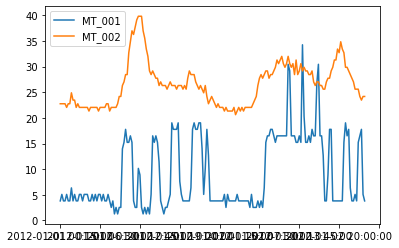

In [10]:
data_example = data.loc['2012-01-01 00:15:00':'2012-01-03 00:00:00'][['MT_001','MT_002']]
data_example.plot()
plt.show()

#### We  note that the main difference between the curves is the level (also seen on the means in df.describe()).  We know we will have to somehow normalize the curves, in order for the clustering technique to capture the behaviour of the consumption throughout the day.

### Data for the analysis

We focus on 2013 and 2014 because these are the years with low number of clients having zero demand

In [11]:
data2011 = data.loc['2011-01-01 00:15:00':'2012-01-01 00:00:00']
data2012 = data.loc['2012-01-01 00:15:00':'2013-01-01 00:00:00']
data2013 = data.loc['2013-01-01 00:15:00':'2014-01-01 00:00:00']
data2014 = data.loc['2014-01-01 00:15:00':'2015-01-01 00:00:00']

In [12]:
# Check number of days
print(data2011.shape[0]/96)
print(data2012.shape[0]/96)
print(data2013.shape[0]/96)
print(data2014.shape[0]/96)

365.0
366.0
365.0
365.0


In [13]:
# See number of clients with 0 demand per year
print(sum(data2011.mean()==0))
print(sum(data2012.mean()==0))
print(sum(data2013.mean()==0))
print(sum(data2014.mean()==0))

210
37
21
1


In [14]:
clients = data2011.columns
clients_no_demand = clients[data2013.mean()==0] # clients with 0 demand
data_13_14 = data2013.append(data2014) # appending 2013 and 2014
data_13_14 = data_13_14.drop(clients_no_demand, axis=1) # drop clients with 0 demand
print(data_13_14.shape)
print(sum(data_13_14.mean()==0)) # check that there are no clients with 0 demand

(70080, 349)
0


## Getting average curves per client

In [15]:
data = data_13_14.copy() # weekdays weekends, data2011, data2012, data2013, data2014

In [16]:
data['hour'] = data.index.map(lambda x: x[11:])

In [17]:
data.head(3)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,hour
2013-01-01 00:15:00,2.538071,22.759602,2.606429,138.211382,63.414634,255.952381,4.522329,239.057239,57.692308,78.494624,...,22300.0,886.075949,1000.000000,16.949153,6.436513,616.330114,76.794658,731.671554,8086.486486,00:15:00
2013-01-01 00:30:00,1.269036,22.759602,2.606429,138.211382,63.414634,264.880952,5.652911,228.956229,57.692308,76.344086,...,21000.0,864.978903,909.090909,18.252934,3.510825,564.530290,76.794658,727.272727,8086.486486,00:30:00
2013-01-01 00:45:00,2.538071,22.759602,2.606429,134.146341,60.975610,250.000000,5.652911,239.057239,54.195804,76.344086,...,18200.0,860.759494,840.909091,16.949153,5.851375,590.869183,68.447412,730.205279,7848.648649,00:45:00


### Getting average curves per client

In [18]:
datagrouped = data.groupby("hour")
average_curves = datagrouped.agg("mean")
average_curves.shape 

(96, 349)

#### The dataframe average_curves contains the 349 typical weekday electric demands

#### We now divide each curve by its mean, so that all curves have mean 1

In [19]:
average_curves_norm = average_curves/(average_curves.mean())

#### Plot the first 2 and last 2 clients

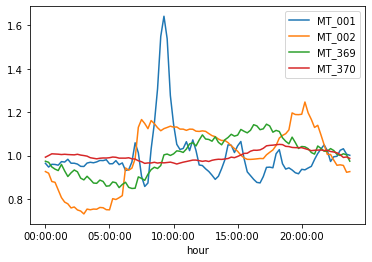

In [20]:
average_curves_norm[['MT_001','MT_002','MT_369','MT_370']].plot()
plt.show()

## Clustering Analysis on the average normalized curves

In [21]:
X = average_curves_norm.copy()  # We call this normalized curve
X = np.array(X.T) # put it on the right format

# Questions (15 marks total)

**Q1: (7 marks)**

a. Determine what a convenient number of clusters. Justify your choice.  Make use of the sklearn's package for k-means for this. You may refer to the module to figure out how to come up with the optimal number of clusters. 

b. Make a plot for each cluster, that includes:
    - The number of clients in the cluster (you can put this in the title of the plot)
    - All the curves in the cluster
    - The curve corresponding to the center of the cluster (make this curve thicker to distinguish it from the individual curves).  The center is also sometimes referred to as "centroid".
    
You have 2 separate plots for each cluster if you prefer (one for the individual curves, one for the centroid)

##### Answer: Q1.A.
##### Cluster = 4 is the optimal clusters for this problem. This is shown by the Elbow Graph below where the graph "bends" at K = 4.

Text(0.5, 1.0, 'Elbow Graph')

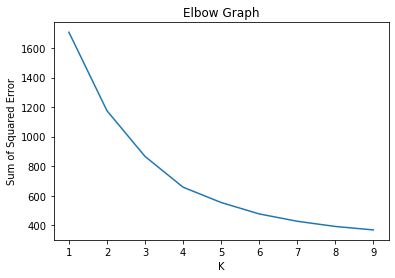

In [22]:
k_list = range(1,10) 
sse = []

for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit_predict(X)
    sse.append(km.inertia_)
    
plt.plot(k_list, sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Graph')

##### Answer: Q1.B. 
##### With Cluster = 4, we name our clusters into Cluster 0, Cluster 1, Cluster 2, and Cluster 3
    - 109 Curves from Cluster 0
    - 35 Curves from Cluster 1
    - 201 Curves from Cluster 2
    - 4 Curves from Cluster 3

In [23]:
km = KMeans(n_clusters=4, random_state=0)
y_pred = km.fit_predict(X)
centroids = km.cluster_centers_

average_curves_norm_T = average_curves_norm.T
average_curves_norm_T['cluster'] = y_pred

df_0 = average_curves_norm_T[average_curves_norm_T.cluster == 0].T[:-1]
df_1 = average_curves_norm_T[average_curves_norm_T.cluster == 1].T[:-1]
df_2 = average_curves_norm_T[average_curves_norm_T.cluster == 2].T[:-1]
df_3 = average_curves_norm_T[average_curves_norm_T.cluster == 3].T[:-1]

index_dict = {}
i = list(range(0,96))
for item in i:
    index_dict[item] = df_0.index[item]
    
centroids_0 = pd.Series(centroids[0]).rename(index_dict)
centroids_1 = pd.Series(centroids[1]).rename(index_dict)
centroids_2 = pd.Series(centroids[2]).rename(index_dict)
centroids_3 = pd.Series(centroids[3]).rename(index_dict)

series_clusters = average_curves_norm_T['cluster'].value_counts().sort_index()
pd.DataFrame(series_clusters)

,cluster
0,109
1,35
2,201
3,4


##### Answer: Q1.B. Cluster 0 Plot. 
##### 109 Curves are in Green. Centroid Curve is in Red.

Text(0.5, 1.0, 'Cluster 0 Curves [109 Curves]')

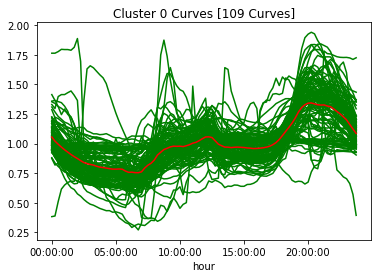

In [24]:
df_0.plot(color='green',legend=False)
centroids_0.plot(color='red')
plt.title('Cluster 0 Curves [109 Curves]')

##### Answer: Q1.B. Cluster 1 Plot.
##### 35 Curves are in Green. Centroid Curve is in Red.

Text(0.5, 1.0, 'Cluster 1 Curves [35 Curves]')

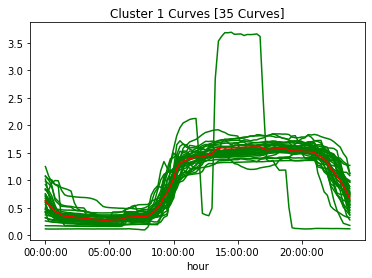

In [25]:
df_1.plot(color='green',legend=False)
centroids_1.plot(color='red')
plt.title('Cluster 1 Curves [35 Curves]')

##### Answer: Q1.B. Cluster 2 Plot.
##### 201 Curves are in Green. Centroid Curve is in Red.

Text(0.5, 1.0, 'Cluster 2 Curves [201 Curves]')

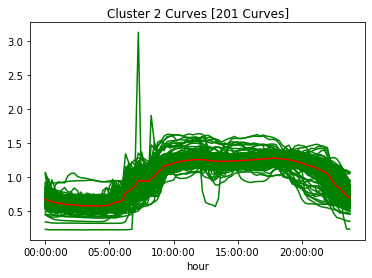

In [26]:
df_2.plot(color='green',legend=False)
centroids_2.plot(color='red')
plt.title('Cluster 2 Curves [201 Curves]')

##### Answer: Q1.B. Cluster 3 Plot.
##### 4 Curves are in Green. Centroid Curve is in Red

Text(0.5, 1.0, 'Cluster 3 Curves [4 Curves]')

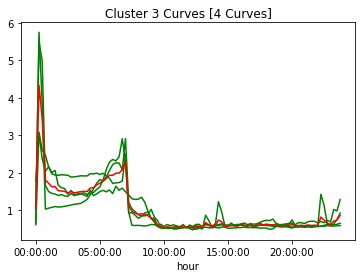

In [27]:
df_3.plot(color='green',legend=False)
centroids_3.plot(color='red')
plt.title('Cluster 3 Curves [4 Curves]')

**Q2: (8 marks)**

In this exercise you work with the daily curves of 1 single client.
First, create a list of arrays, each array containing a curve for a day. You may use X from the cells above.
    X = average_curves_norm.copy() 
The list contains 730 arrays, one for each of the days of 2013 and 2014.

a. Determine the optimal value of k ( number of clusters). This time you may also perform silhoutte analysis as stated in the module. Carrying out silhoutte analysis is left as an exercise. What do you understand about the clusters? 

b. Based on your results from your analyses of both methods, what do understand?  Interpret it perhaps with different perspectives of timelines like weeks or months.

In [28]:
client = 'MT_022'
oneClient = data_13_14[client]
X = [] # a list of arrays, each array being a normalized curve for a day
for J in range(2*365):
    X.extend([np.array(oneClient[J*96:(J+1)*96])])#/np.mean(oneClient[J*96:(J+1)*96])]) 

In [29]:
from datetime import date, timedelta

d1 = date(2013, 1, 1)  # start date
d2 = date(2014, 12, 31)  # end date
delta = d2 - d1         # timedelta
daysyear = []
D = {0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}
for i in range(delta.days + 1):
    daysyear.extend([D[(d1 + timedelta(days=i)).weekday()]+"-"+str(d1 + timedelta(days=i))])

#### The following cell shows you how to do the following: given a list L, and a list of booleans B (True, False), get the sublist of L that corresponds to the True values in B. For example if L=[1,2,3,4] and B=[False,True,True,False], then the results is [2,3]. This is also helpful for pard (b)

In [30]:
from itertools import compress
L = [1,2,3,4]
B = [False, True, True, False]
list(compress(L, B))

[2, 3]

##### Answer: Q2.A.
##### Cluster = 2 is the optimal clusters for this problem. This is shown by the Elbow Graph below where the graph "bends" at K = 2.

Text(0.5, 1.0, 'Elbow Graph')

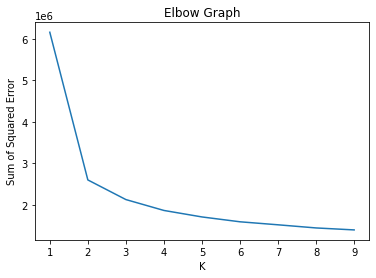

In [31]:
k_list = range(1,10) 
sse = []

for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit_predict(X)
    sse.append(km.inertia_)
    
plt.plot(k_list, sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Graph')

##### Answer: Q2.A.
##### Based on Silhouette Analysis, Optimal Cluster is at K = 2 as it has highest Silhouette Score at 0.50

In [32]:
ks_list = list(range(2,11))
silhouette_score_list = []
for k in ks_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    labels = km.labels_
    score = silhouette_score(X, labels, metric='euclidean')
    silhouette_score_list.append(score)
silhouette_score_list

[0.5011374240143703,
 0.28219774161561884,
 0.2811100481847252,
 0.219659157757787,
 0.1925297165194527,
 0.1802747557110494,
 0.1837380688416942,
 0.18809023366827565,
 0.17641646008394868]

##### Answer: Q2.B.
##### With Cluster = 2, we name our clusters into Cluster 0 and Cluster 1
    - There are 219 Curves from Cluster 0
    - There are 511 Curves from Cluster 1

In [33]:
km = KMeans(n_clusters=2, random_state=0)
y_pred = km.fit_predict(X)
centroids = km.cluster_centers_

df_oneClient = pd.DataFrame(oneClient)
df_oneClient['hour'] = df_oneClient.index.map(lambda x: x[11:])
df_oneClient['date'] = df_oneClient.index.map(lambda x: x[:10])

hour_index = list(df_oneClient.hour.unique())
date_index = list(df_oneClient.date.unique())

hour_index_dict = {}
i = list(range(0,96))
for item in i:
    hour_index_dict[item] = hour_index[item]
    
date_index_dict = {}
i = list(range(0,730))
for item in i:
    date_index_dict[item] = date_index[item]
    
df_MT_022 = pd.DataFrame(X, columns=hour_index)
df_MT_022 = df_MT_022.T.rename(columns=date_index_dict).T
df_MT_022['cluster'] = y_pred


series_MT_022_clusters = df_MT_022['cluster'].value_counts().sort_index()
pd.DataFrame(series_MT_022_clusters)

,cluster
0,219
1,511


In [34]:
df_MT_022_0 = df_MT_022[df_MT_022.cluster == 0].T[:-1]
df_MT_022_1 = df_MT_022[df_MT_022.cluster == 1].T[:-1]

MT_022_centroids_0 = pd.Series(centroids[0]).rename(hour_index_dict)
MT_022_centroids_1 = pd.Series(centroids[1]).rename(hour_index_dict)

##### Answer: Q2.B.
##### Cluster 0 Plot. 219 Curves are in Green. Centroid Curve is in Red.

Text(0.5, 1.0, 'Cluster 0 Curves [219 Curves]')

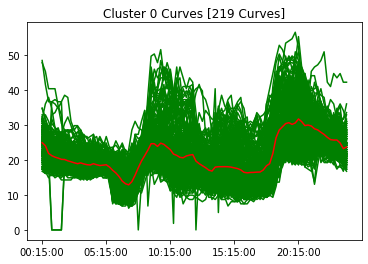

In [35]:
df_MT_022_0.plot(color='green',legend=False)
MT_022_centroids_0.plot(color='red')
plt.title('Cluster 0 Curves [219 Curves]')

##### Answer: Q2.B.
##### Cluster 0 Plot. 511 Curves are in Green. Centroid Curve is in Red.

Text(0.5, 1.0, 'Cluster 1 Curves [511 Curves]')

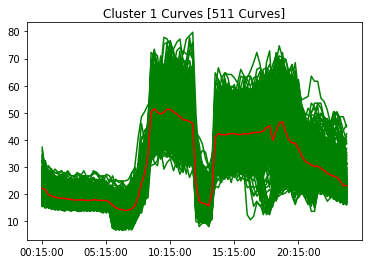

In [36]:
df_MT_022_1.plot(color='green',legend=False)
MT_022_centroids_1.plot(color='red')
plt.title('Cluster 1 Curves [511 Curves]')

##### Answer: Q2.B.
##### There are more Cluster 1 curves on the weekdays (Mon - Fri), and more Cluster 0 curves over the weekends (Sat - Sun). This may suggest that electricity demand of client MT_022 depends on work-hours.
    - From Cluster 1 (which has more curves for Mon - Fri), we see high electricity demand during work-hours (9 AM - 12 PM, then 1 PM to 7 PM)
    - From Cluster 0 (which has more curves from Sat - Sun), we see steady electricity demand throughout the day

In [37]:
days_dict = {}
days_dict['mon'] = []
days_dict['tue'] = []
days_dict['wed'] = []
days_dict['thu'] = []
days_dict['fri'] = []
days_dict['sat'] = []
days_dict['sun'] = []

for item in daysyear:
    days_dict[item[:3]].append(item[4:])

df_MT_022_mon = df_MT_022.T[days_dict['mon']]
df_MT_022_tue = df_MT_022.T[days_dict['tue']]
df_MT_022_wed = df_MT_022.T[days_dict['wed']]
df_MT_022_thu = df_MT_022.T[days_dict['thu']]
df_MT_022_fri = df_MT_022.T[days_dict['fri']]
df_MT_022_sat = df_MT_022.T[days_dict['sat']]
df_MT_022_sun = df_MT_022.T[days_dict['sun']]

series_mon = df_MT_022_mon.T.cluster.value_counts().sort_index()
series_tue = df_MT_022_tue.T.cluster.value_counts().sort_index()
series_wed = df_MT_022_wed.T.cluster.value_counts().sort_index()
series_thu = df_MT_022_thu.T.cluster.value_counts().sort_index()
series_fri = df_MT_022_fri.T.cluster.value_counts().sort_index()
series_sat = df_MT_022_sat.T.cluster.value_counts().sort_index()
series_sun = df_MT_022_sun.T.cluster.value_counts().sort_index()

data_summary = {
    'Mon': series_mon,
    'Tue': series_tue,
    'Wed': series_wed,
    'Thu': series_thu,
    'Fri': series_fri,
    'Sat': series_sat,
    'Sun': series_sun,
}

pd.concat(data_summary, axis = 1)

,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0.0,12,12,12,10,11,58,104.0
1.0,92,93,93,94,93,46,NaN
